In [1]:
#import dependencies 
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# csv's we want to look at
city_data_to_load = "resources/city_data.csv"
ride_data_to_load = "resources/ride_data.csv"

In [6]:
# make data frames
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [13]:
# checking data in city_data_df --------------------------------------------------------
city_data_df.count() #everything seems in order
#get the columns and the rows that are not null
city_data_df.isnull().sum() # looks good
#get the data type for each column
city_data_df.dtypes
# get the unique calues of the type of city
city_data_df["type"].unique()
#get the total types  cities
sum(city_data_df["type"] == "Urban") # 66
sum(city_data_df["type"] == "Suburban") #36
sum(city_data_df["type"] == "Rural") #18

18

In [17]:
# checking data in ride_data_df --------------------------------------------------------
# getting columns and rows that are not null
ride_data_df.count() #looks good
# getting columns and the rows that are not null
ride_data_df.isnull().sum() #looks good
#get the data types
ride_data_df.dtypes
ride_data_df.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344


In [18]:
# merging the data frames on city
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city","city"])
pyber_data_df.head(10)

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437,10,Urban
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091,44,Urban
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754,21,Urban
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694,4,Urban
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789,33,Urban


In [20]:
# USING FILTERS creat the Urban City DataFrame
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
urban_cities_df.head(10)

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437,10,Urban
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091,44,Urban
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754,21,Urban
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694,4,Urban
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789,33,Urban


In [22]:
# USING FILTERS create the Suburban DataFrame
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]

In [24]:
# USING FILTERS create the rural DataFrame
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]
rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


In [28]:
# getting ride counts
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]

In [39]:
# getting the average far for each city
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]
urban_avg_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [40]:
# getting average number of drivers for each urban city
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]

<function matplotlib.pyplot.legend(*args, **kwargs)>

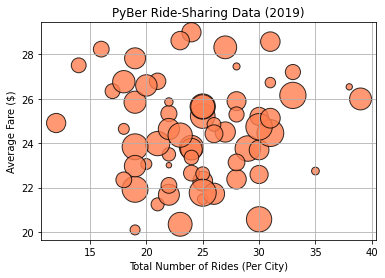

In [44]:
#building scatter plot of Urban Cities
plt.scatter(urban_ride_count,urban_avg_fare, 
            s = 10 * urban_driver_count, c = "coral",
           edgecolor = "black", linewidths = 1,
           alpha = 0.8, label = "Urban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# add legend
plt.legend

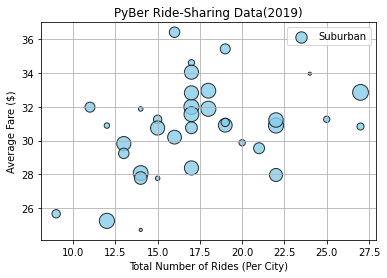

In [46]:
# Suburban Scatter Plot
plt.scatter(suburban_ride_count, 
           suburban_avg_fare,
           s = 10* suburban_driver_count, c="skyblue",
           edgecolor="black", linewidths = 1,
           alpha = 0.8, label = "Suburban")
plt.title("PyBer Ride-Sharing Data(2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
#add legend
plt.legend()

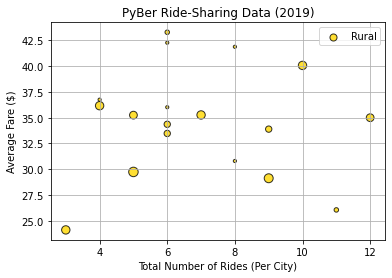

In [47]:
# Rural Scatter Plot
plt.scatter(rural_ride_count,
           rural_avg_fare,
           s= 10* rural_driver_count, c= "gold",
           edgecolor = "black", linewidths = 1,
           alpha = .8, label = "Rural")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# add legend
plt.legend()